#Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Mounting on gdrive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')    

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/DS Project/

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/DS Project/'
/content


Loading dataset containing IPL match details from 2008 to 2020

In [ ]:
data=pd.read_csv("IPL Matches 2008-2020.csv")
df=data.copy()
data


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


#Exploratory Data Analysis & Data Cleaning

In [ ]:
 # Rising Pune Supergiants and Rising Pune Supergiant was mentioned differently

 data = data.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'}, regex=True)
 data = data.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants'}, regex=True)


In [ ]:
#details of the dataset
data.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [ ]:
# data types of different column values
data.dtypes

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object

In [ ]:
# Number of Unique Values in each column
data.nunique()

id                 816
city                32
date               596
player_of_match    233
venue               36
neutral_venue        2
team1               14
team2               14
toss_winner         14
toss_decision        2
winner              14
result               3
result_margin       91
eliminator           2
method               1
umpire1             48
umpire2             47
dtype: int64

In [ ]:
#Calculating Nan values in each columns
for col in data:
  print("NaN values {} - {}".format(col,df[col].isnull().sum()))


NaN values id - 0
NaN values city - 13
NaN values date - 0
NaN values player_of_match - 4
NaN values venue - 0
NaN values neutral_venue - 0
NaN values team1 - 0
NaN values team2 - 0
NaN values toss_winner - 0
NaN values toss_decision - 0
NaN values winner - 4
NaN values result - 4
NaN values result_margin - 17
NaN values eliminator - 4
NaN values method - 797
NaN values umpire1 - 0
NaN values umpire2 - 0


In [ ]:
# if no winner i.e. NaN in 'winner' column, then Draw
data['winner'].fillna('Draw' , inplace=True)

In [ ]:
#dropping the factors that have little to no effect on the outcome of the match
irrelevant = [ 'id','venue','date','player_of_match','result','result_margin','eliminator','method','umpire1','umpire2' ]
data.drop(irrelevant,axis=1, inplace=True)



In [ ]:
data.shape

(816, 7)

In [ ]:
data.head()

,city,neutral_venue,team1,team2,toss_winner,toss_decision,winner
0,Bangalore,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders
1,Chandigarh,0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings
2,Delhi,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils
3,Mumbai,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore
4,Kolkata,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders


In [ ]:
#only considering matches which do not result in a draw for better graphical representations
data = data[data['winner']!= "Draw"]
len(data.index)

812

In [ ]:
#sumit
#total number of wins of each teams
team_wins=data['winner'].value_counts()
team_wins

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [ ]:
#defining a list containing all the team that have played in IPL from 2008 to 2020
x=['Mumbai Indians',                 
'Chennai Super Kings',            
'Kolkata Knight Riders',           
'Royal Challengers Bangalore',     
'Kings XI Punjab',   
'Rajasthan Royals', 
'Delhi Daredevils',
'Sunrisers Hyderabad',
'Deccan Chargers',
'Delhi Capitals',
'Rising Pune Supergiants',
'Gujarat Lions',
'Pune Warriors',
'Kochi Tuskers Kerala']

In [ ]:
len(data.index)

812

In [ ]:
#Calculating the number of tie a team has won the toss
toss_wins= data['toss_winner'].value_counts()
wins= data['winner'].value_counts()
print(toss_wins)
print('\n')
print(wins)


Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     86
Kings XI Punjab                 85
Rajasthan Royals                85
Delhi Daredevils                79
Sunrisers Hyderabad             57
Deccan Chargers                 43
Delhi Capitals                  20
Pune Warriors                   20
Gujarat Lions                   15
Rising Pune Supergiants         13
Kochi Tuskers Kerala             8
Name: toss_winner, dtype: int64


Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala 

In [ ]:
np.arange(len(x))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

Text(0, 0.5, 'WINS')

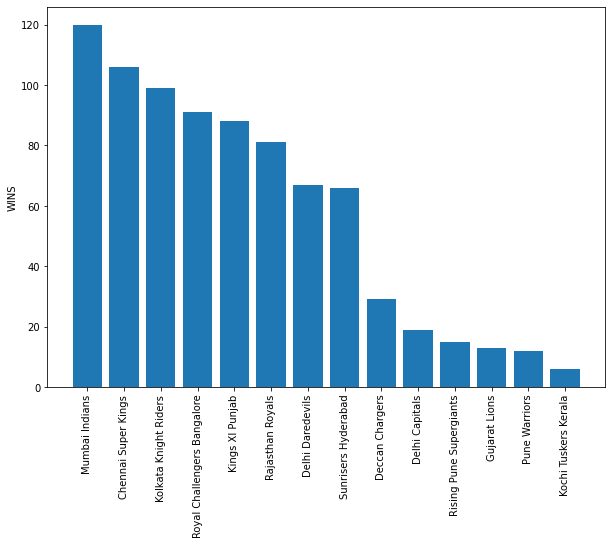

In [ ]:
#plotting the number of match wins of all the teams
fig = plt.figure(figsize =(10, 7))
plt.bar(wins.keys(), height=wins)
plt.xticks(rotation=90)
plt.ylabel('WINS')

Text(0, 0.5, 'Toss WINS')

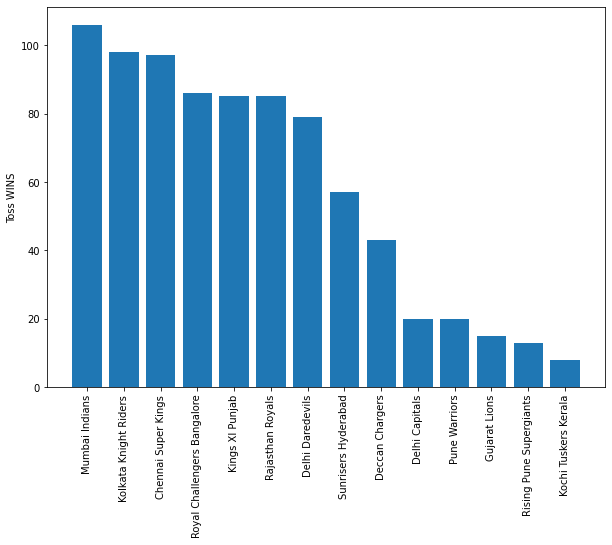

In [ ]:
#plotting the number of toss wins of all the teams
fig = plt.figure(figsize =(10, 7))
plt.bar(toss_wins.keys(), height=toss_wins)
plt.xticks(rotation=90)
plt.ylabel('Toss WINS')

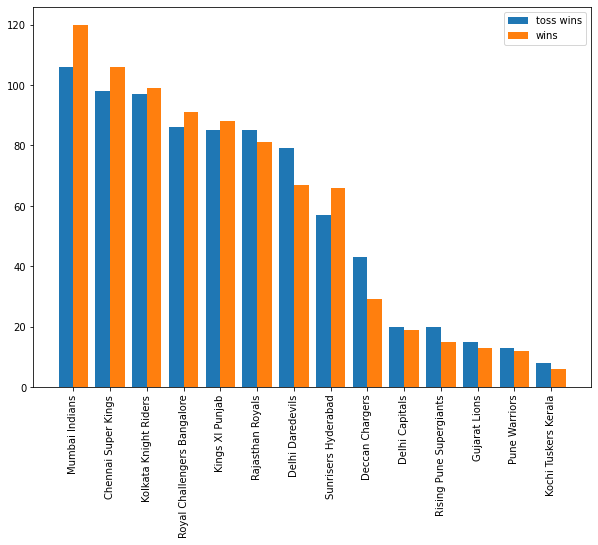

In [ ]:
#plotting the no. of toss wins with the number of match wins for all the teams
fig = plt.figure(figsize =(10, 7))
plt.bar(np.arange(len(x)) - 0.2, toss_wins, 0.4, label = 'toss wins')
plt.bar(np.arange(len(x)) + 0.2, wins, 0.4, label = 'wins')
plt.xticks(np.arange(len(x)), x)
plt.xticks(rotation=90)
plt.legend()

In [ ]:
#total number of matches played by teams in IPL
total_played= data['team1'].value_counts() + data['team2'].value_counts()
total_played

Chennai Super Kings            178
Deccan Chargers                 75
Delhi Capitals                  33
Delhi Daredevils               159
Gujarat Lions                   30
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          192
Mumbai Indians                 203
Pune Warriors                   45
Rajasthan Royals               159
Rising Pune Supergiants         30
Royal Challengers Bangalore    192
Sunrisers Hyderabad            124
dtype: int64

Text(0, 0.5, 'PERCENT WINS')

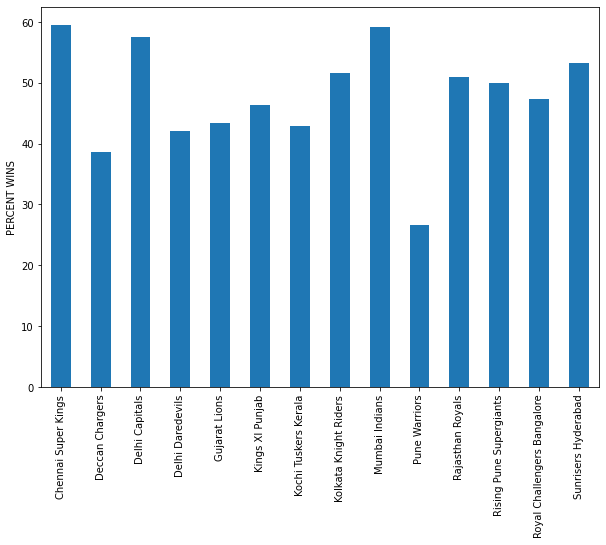

In [ ]:
#percentage of matches won out of the matches played
fig = plt.figure(figsize =(10, 7))
percent_won= team_wins/total_played*100
percent_won.plot.bar()
plt.ylabel('PERCENT WINS')

In [ ]:
#arranged
total_played= [203, 178, 192, 195, 190, 161, 161, 124, 75, 33, 30, 30, 46, 14]

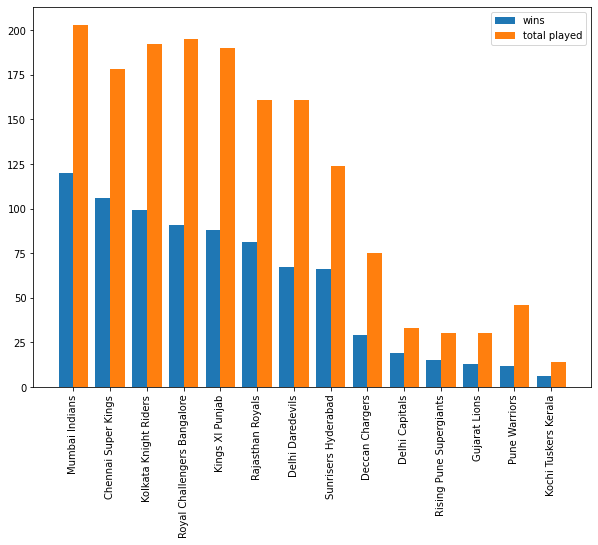

In [ ]:
fig = plt.figure(figsize =(10, 7))
#plotting wins with the total number of matches played

plt.bar(np.arange(len(x)) - 0.2, wins, 0.4, label = 'wins')
plt.bar(np.arange(len(x)) + 0.2, total_played, 0.4, label = 'total played')
plt.xticks(np.arange(len(x)), x)
plt.xticks(rotation=90)
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


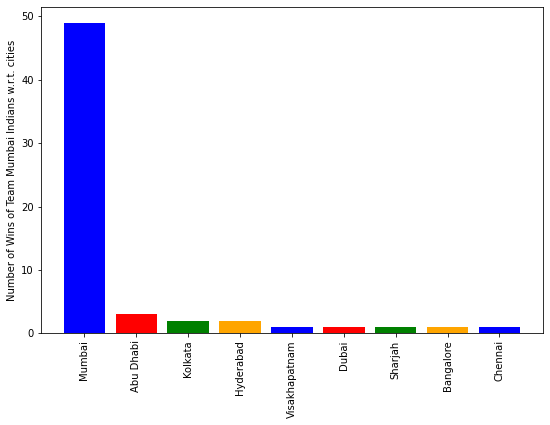

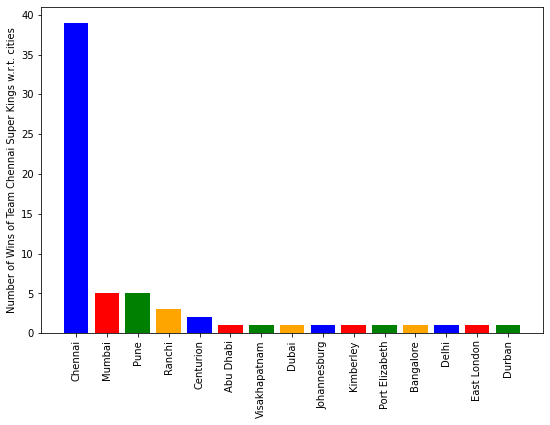

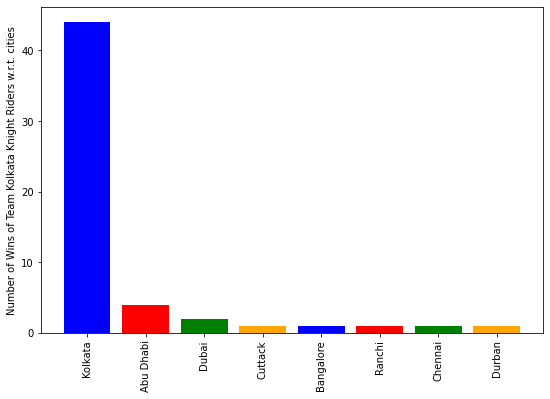

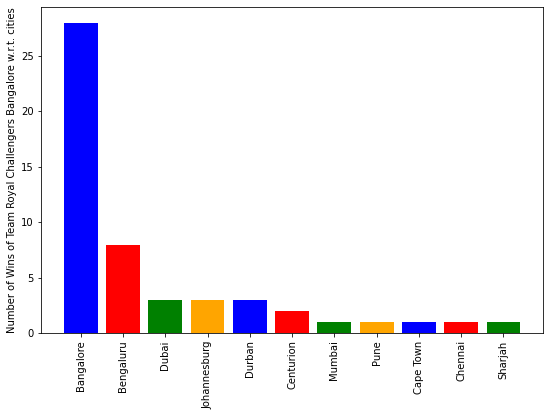

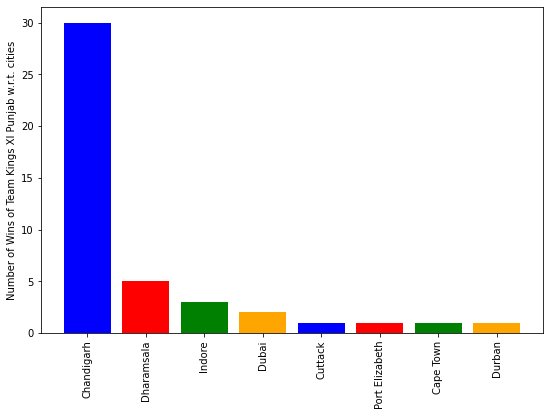

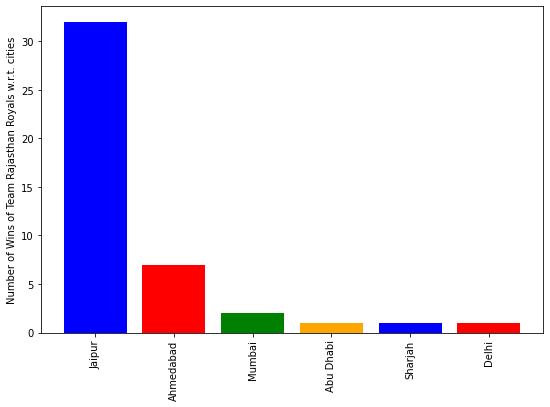

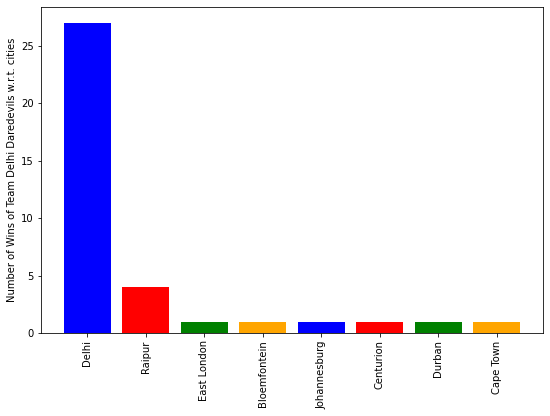

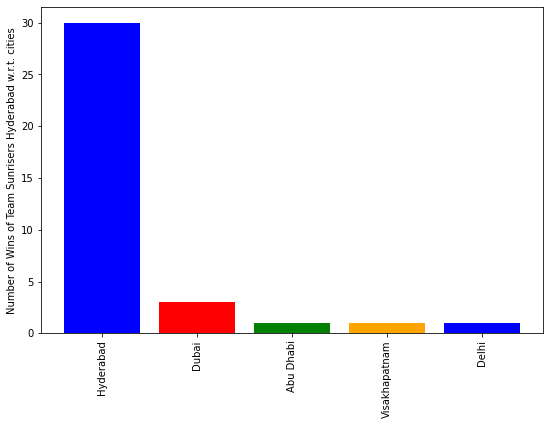

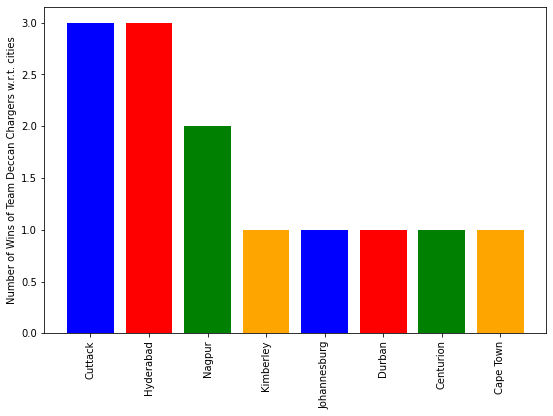

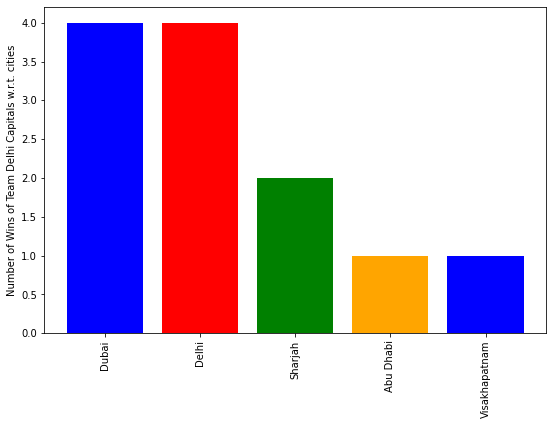

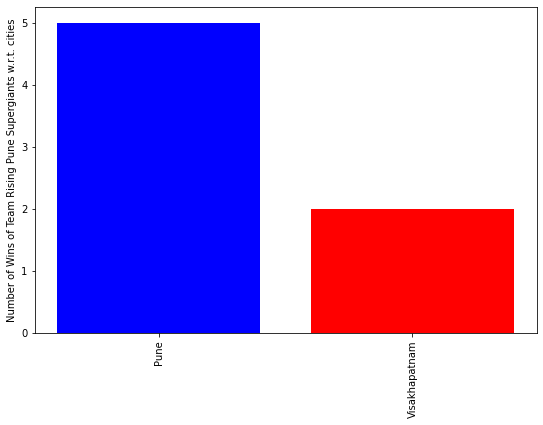

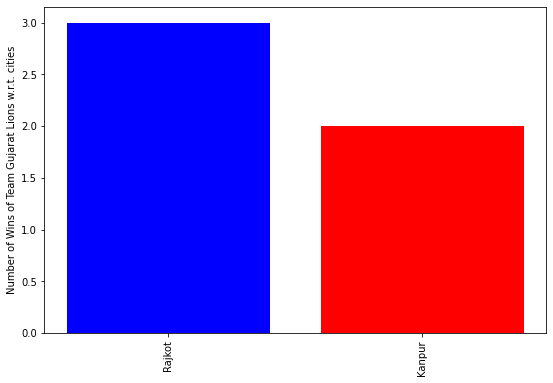

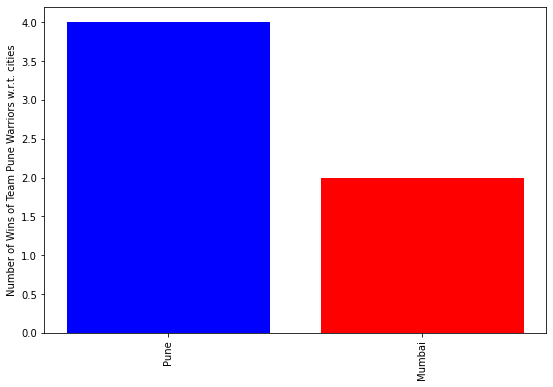

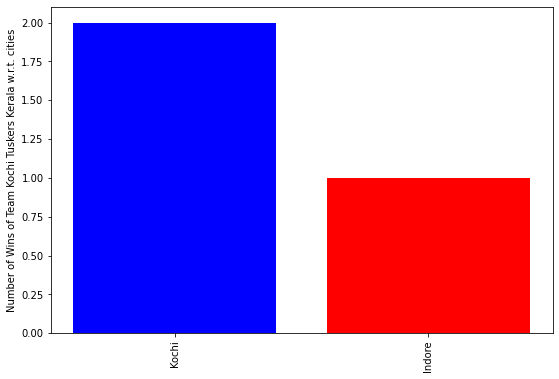

In [ ]:
#graphing the number of matches won by teams in different cities
for i in x:
   df2=data[(data["team1"]==i)]
   plt.figure(figsize=(9,6))
   plt.bar(list(df2[data["winner"]==data["team1"]]["city"].value_counts().keys()),list(df2[data["winner"]==data["team1"]]["city"].value_counts()),color=("Blue", "Red", "Green", "Orange", "Blue", "Red", "Green", "Orange", "Blue", "Red", "Green", "Orange", "Blue", "Red", "Green", "Orange", "Blue", "Red", "Green", "Orange", "Blue", "Red", "Green", "Orange", "Blue", "Red", "Green", "Orange", "Blue", "Red", "Green", "Orange", "Blue", "Red", "Green", "Orange"))
   plt.xticks(rotation=90)
   plt.ylabel("Number of Wins of Team "+str(i)+" w.r.t. cities")
   plt.show()
   print(" ")
   print(" ")

[47, 50]
['field', 'bat']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


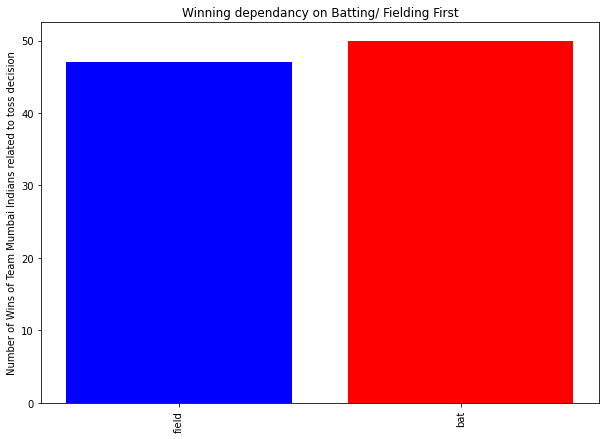

 
 
[52, 42]
['bat', 'field']


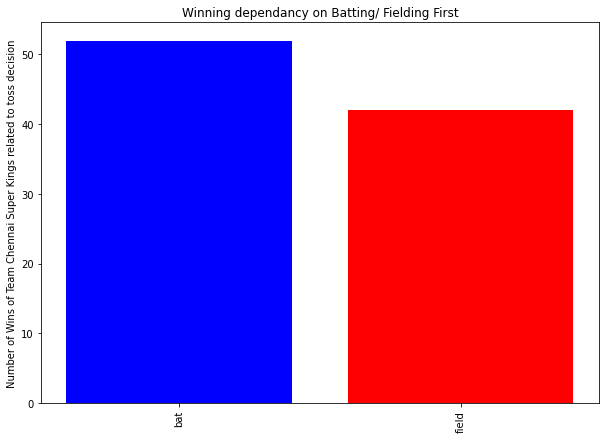

 
 
[56, 39]
['field', 'bat']


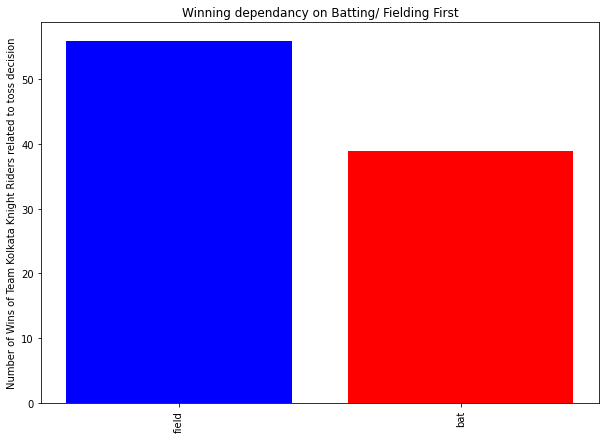

 
 
[58, 47]
['field', 'bat']


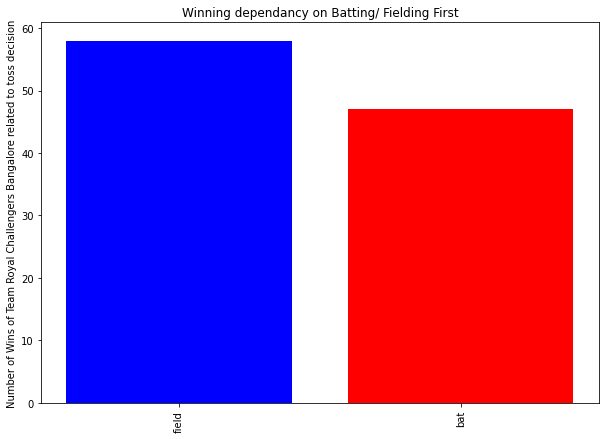

 
 
[53, 39]
['field', 'bat']


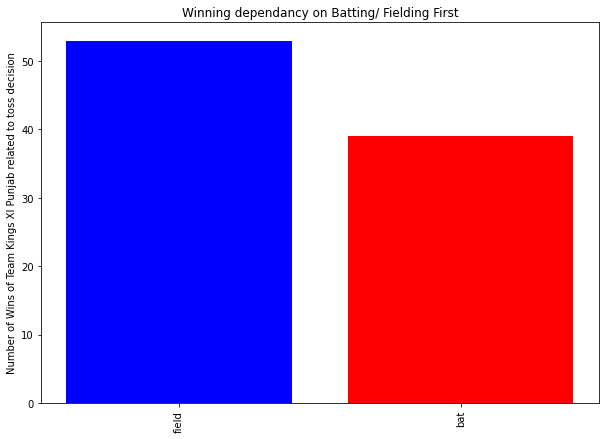

 
 
[41, 29]
['field', 'bat']


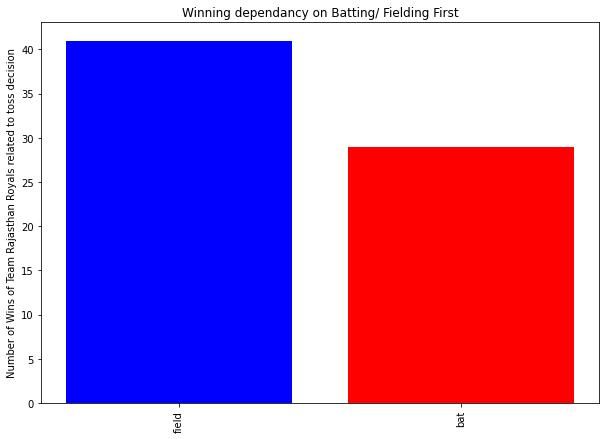

 
 
[46, 36]
['field', 'bat']


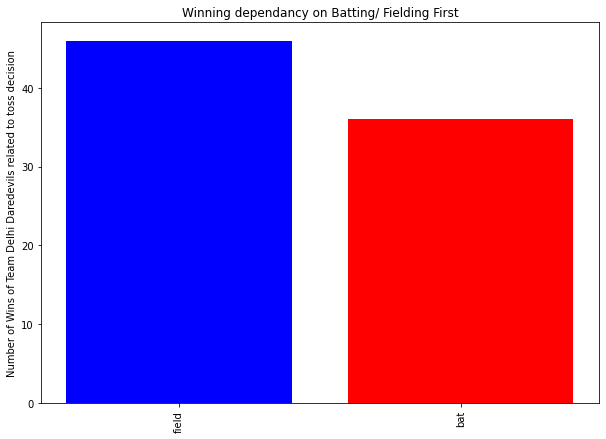

 
 
[33, 26]
['field', 'bat']


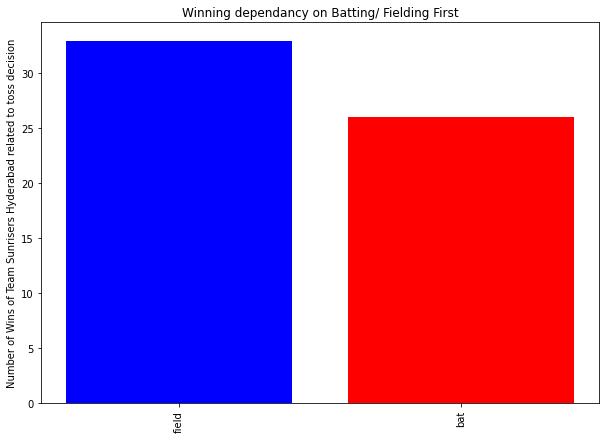

 
 
[19, 20]
['bat', 'field']


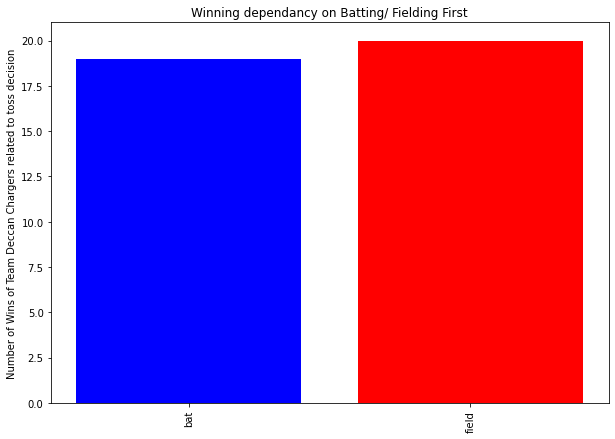

 
 
[10, 9]
['field', 'bat']


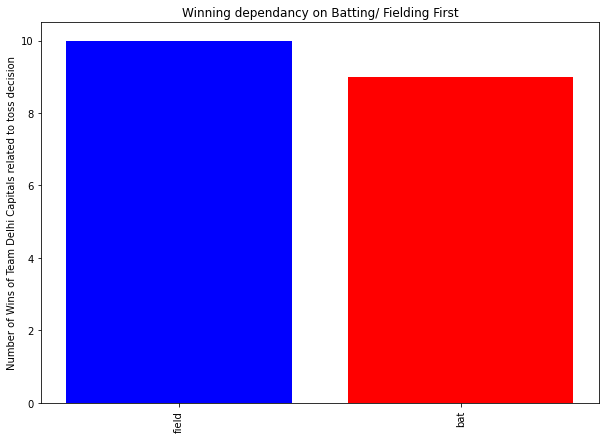

 
 
[10, 4]
['field', 'bat']


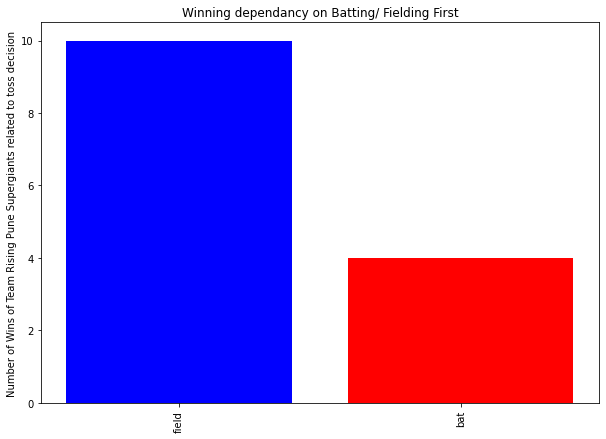

 
 
[13]
['field', 'bat']


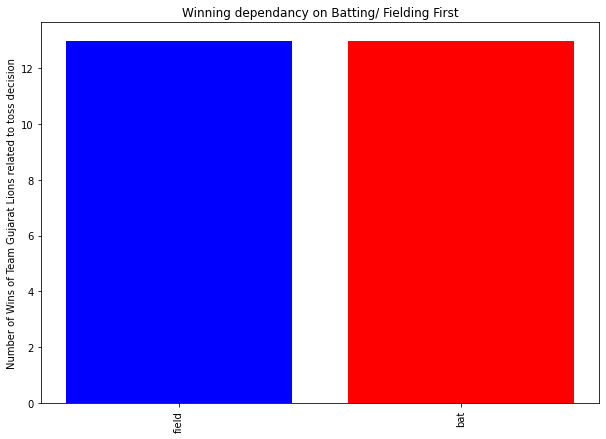

 
 
[11, 12]
['bat', 'field']


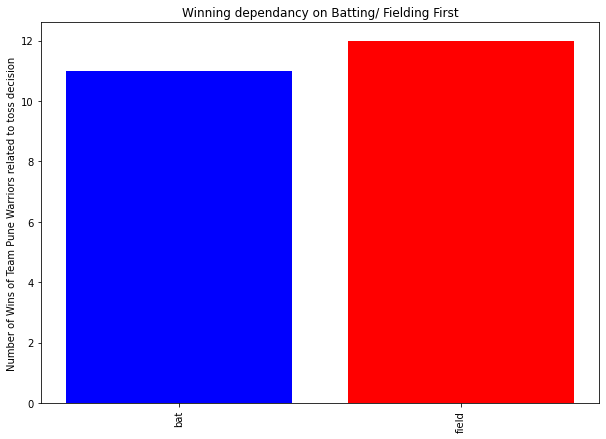

 
 
[4, 3]
['field', 'bat']


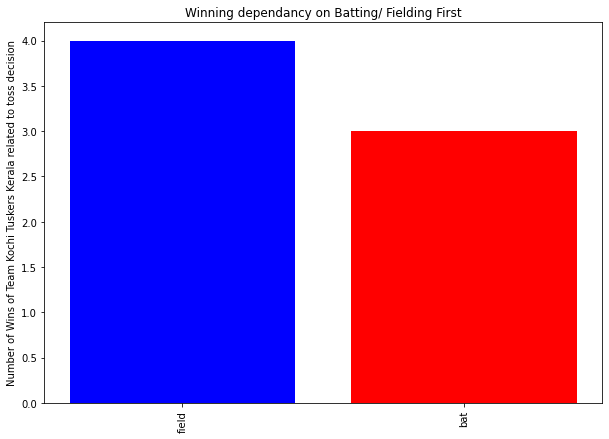

In [ ]:
#plotting the number of wins of teams when they batted first vs when the fielded first
for i in x:
   df2=data[data["team1"]==i]
   plt.figure(figsize=(10,7))

   value =list(df2[data["winner"]==data["toss_winner"]]["toss_decision"].value_counts()) #if team won toss and decided
   
   r= list(df2[data["winner"]!=data["toss_winner"]]["toss_decision"].value_counts()) # if team lost toss and got the opposite of what the other team decided
   
   value[0]= value[0]+r[1]
   if(len(value)!=1):
    value[1]= value[1]+r[0]
   print(value)

   #value contains the list of wins when fielded and batted first

   lst= list(df2[data["winner"]==data["team1"]]["toss_decision"].value_counts().keys())
   if(len(lst)==1):
      
      if(lst[0]=="bat"):
        lst.append('field')
      elif(lst[0]=="field"):
        lst.append('bat')

   print(lst)

   plt.bar(lst,value,color=("Blue", "Red"))
   plt.xticks(rotation=90)
   plt.ylabel("Number of Wins of Team "+str(i)+" related to toss decision")
   plt.title('Winning dependancy on Batting/ Fielding First')
   plt.show()
   print(" ")
   print(" ")

[61, 45]
[61, 36]
[55, 43]
[43, 43]
[36, 49]
[44, 41]
[35, 44]
[29, 28]
[19, 24]
[10, 10]
[8, 5]
[10, 5]
[3, 17]
[4, 4]


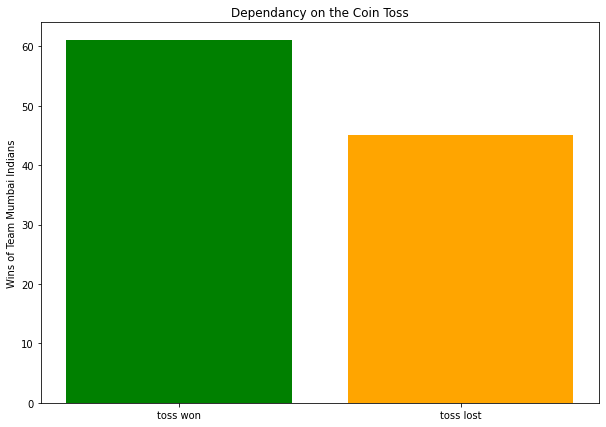

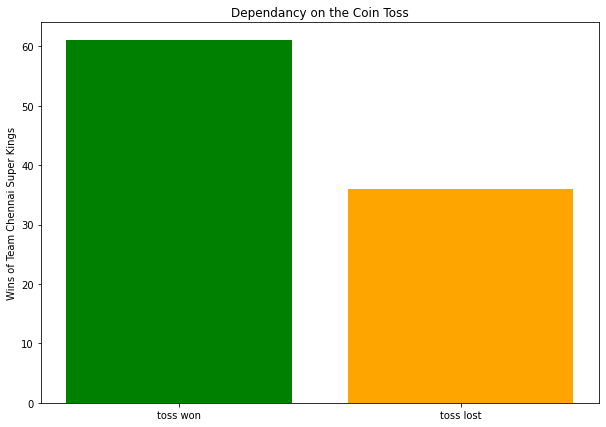

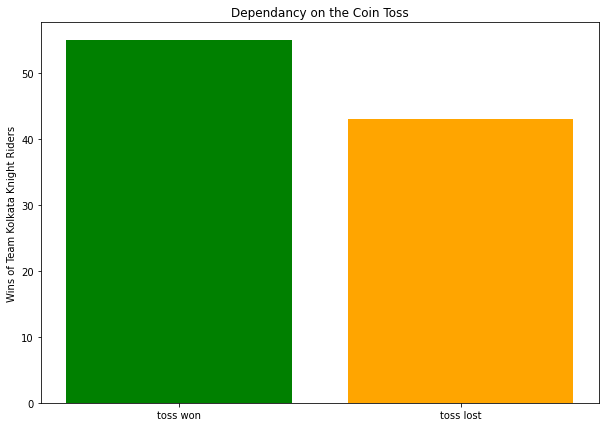

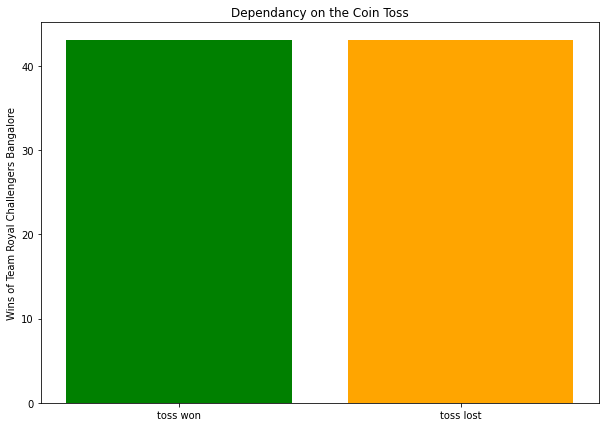

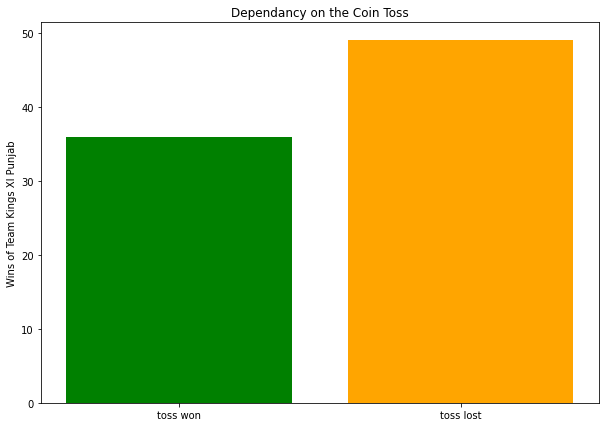

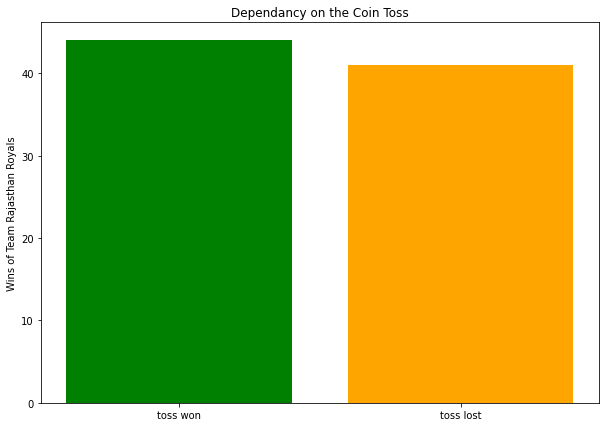

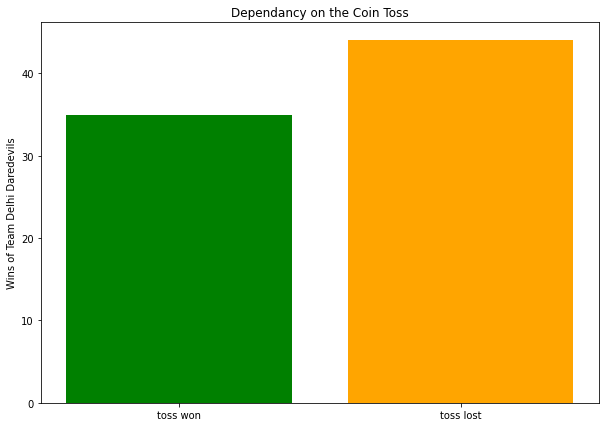

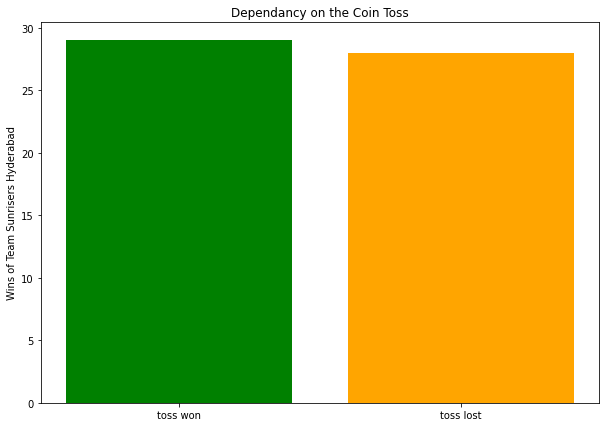

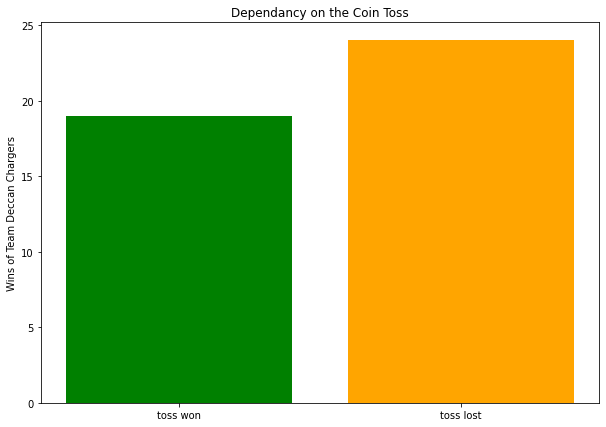

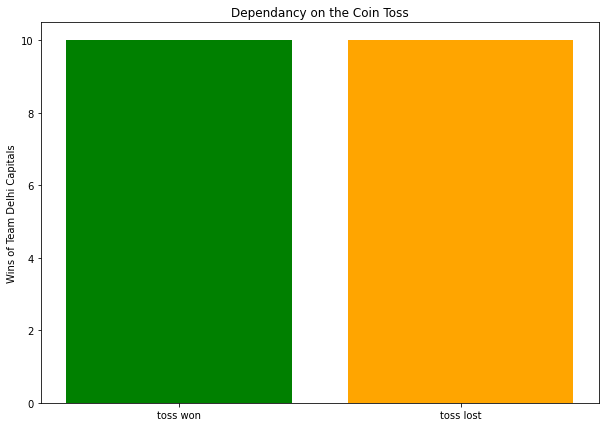

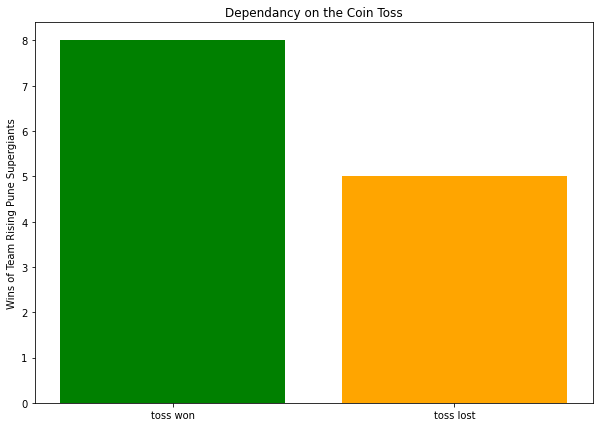

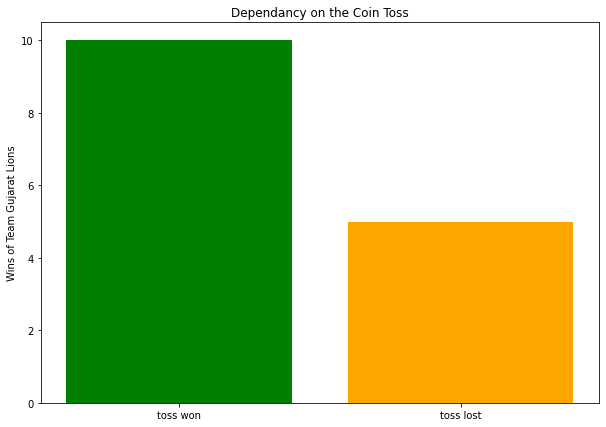

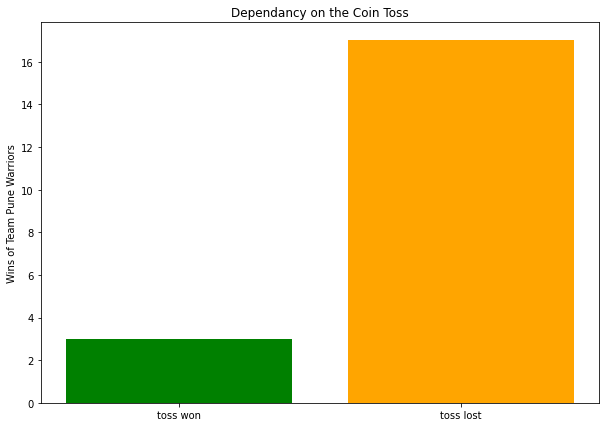

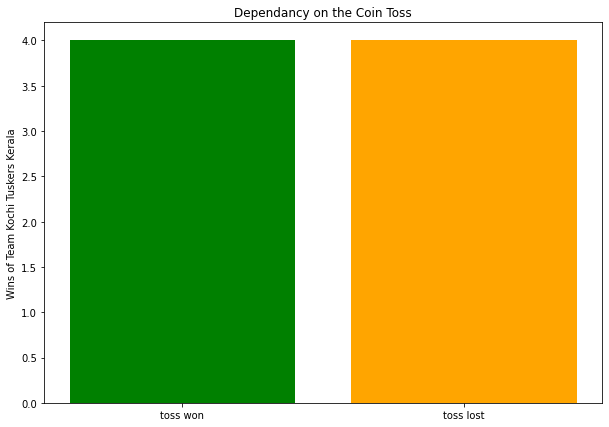

In [ ]:
#plotting the relation between winning and losing the toss and the outcome of the match(winninng)
for i in x:
   df2=data[data["toss_winner"]==i]
   plt.figure(figsize=(10,7))

   df3= df2[df2["winner"]==i]
   
   a=[]
   a.append(df2.shape[0])
   a.append(df3.shape[0])
   
   a.append(a[0]-a[1])

   #a[1] wins when toss won
   #a[2] wins when toss lost
   print([a[1],a[2]]) 

   plt.bar(('toss won', 'toss lost'),[a[1],a[2]],color=("Green", "Orange"))
   plt.ylabel("Wins of Team "+str(i))
   plt.title("Dependancy on the Coin Toss")





In [ ]:
# defining a function to get variables highly correlated
#function return the columns which have a higher correlation than the threshold value
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
#om
#importing libraries
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [ ]:
data.head(10)

,city,neutral_venue,team1,team2,toss_winner,toss_decision,winner
0,Bangalore,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders
1,Chandigarh,0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings
2,Delhi,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils
3,Mumbai,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore
4,Kolkata,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders
5,Jaipur,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals
6,Hyderabad,0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils
7,Chennai,0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings
8,Hyderabad,0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals
9,Chandigarh,0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab


##Label Encoding

In [ ]:
data2=data.copy()
#label encoding
for col in ['city','neutral_venue','team1', 'team2', 'toss_winner','toss_decision','winner']:
 data2[col]=enc.fit_transform(data2[col])
data2.head(10)

,city,neutral_venue,team1,team2,toss_winner,toss_decision,winner
0,2,0,12,7,12,1,7
1,7,0,5,0,0,0,0
2,10,0,3,10,10,0,3
3,23,0,8,12,8,0,12
4,22,0,7,1,1,0,7
5,17,0,10,5,5,0,10
6,15,0,1,3,1,0,3
7,8,0,0,8,8,1,0
8,15,0,1,10,10,1,10
9,7,0,5,8,8,1,5


In [ ]:
#list to reference back from the encoded form

backtrack= ['Chennai Super Kings','Deccan Chargers','Delhi Capitals', 'Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Kochi Tuskers Kerala','Kolkata Knight Riders','Mumbai Indians','Pune Warriors','Rajasthan Royals','Rising Pune Supergiants','Royal Challengers Bangalore','Sunrisers Hyderabad ']

In [ ]:
correlation(data2,0.1)

{'team2', 'toss_decision', 'toss_winner', 'winner'}

Heat Map


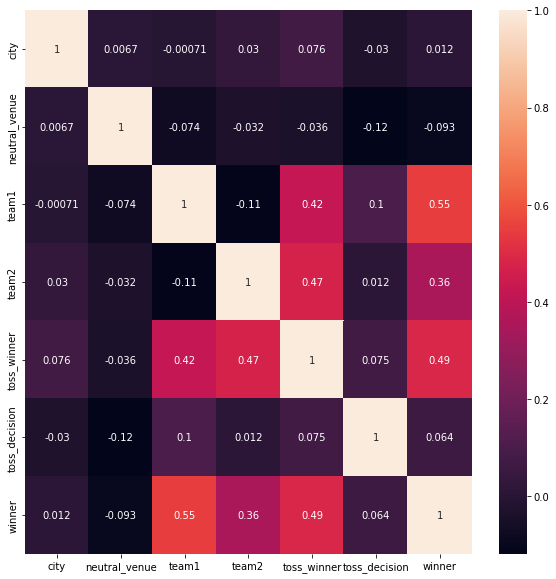

In [ ]:
#plotting the heat map
plt.figure(figsize=(10,10))
sns.heatmap(data2.corr(),annot=True)
plt.show()

#Building Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

In [ ]:
#defining features and labels
features = data2.drop(['winner'], axis=1)
labels = data2['winner']



In [ ]:
# 80:20 split
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print("Training Set :{}".format(train_features.shape))
print("\nTesting Set :{}".format(test_features.shape))

Training Set :(649, 6)

Testing Set :(163, 6)


##Random Forest Classifier

In [ ]:
forest= RandomForestClassifier(n_estimators=200)
forest.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=200)

In [ ]:
print("Train Accuracy- {}%".format(forest.score(train_features, train_labels)*100))

Train Accuracy- 88.4437596302003%


In [ ]:
forest.fit(test_features, test_labels)

RandomForestClassifier(n_estimators=200)

In [ ]:
print("Test Accuracy- {}%".format(forest.score(test_features, test_labels)*100))

Test Accuracy- 93.86503067484662%


In [ ]:
print("---- Random Forest Classifier - Model Evaluation ----")
y_pred = forest.predict(test_features) #predicted labels

#error scores
print("MAE- {}".format(metrics.mean_absolute_error(test_labels, y_pred)))
print("MSE- {}".format(metrics.mean_squared_error(test_labels, y_pred)))
print("RMSE - {}".format(np.sqrt(metrics.mean_squared_error(test_labels, y_pred))))

---- Random Forest Classifier - Model Evaluation ----
MAE- 0.3312883435582822
MSE- 2.4049079754601226
RMSE - 1.5507765717407915


##Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(train_features, train_labels)
print("Train Accuracy- {}%".format(tree.score(train_features, train_labels)*100))

Train Accuracy- 79.19876733436055%


In [ ]:
tree.fit(test_features, test_labels)
print("Test Accuracy- {}%".format(tree.score(test_features, test_labels)*100))

Test Accuracy- 84.04907975460122%


In [ ]:
print("---- Decision Tree Regressor - Model Evaluation ----")

y_pred = tree.predict(test_features)
print("MAE- {}".format(metrics.mean_absolute_error(test_labels, y_pred)))
print("MSE- {}".format(metrics.mean_squared_error(test_labels, y_pred)))
print("RMSE - {}".format(np.sqrt(metrics.mean_squared_error(test_labels, y_pred))))

---- Decision Tree Regressor - Model Evaluation ----
MAE- 0.7668711656441718
MSE- 4.987730061349693
RMSE - 2.2333226505253765


We will use Random Forest Classifier as our model as it is performing better  and giving better accuracy and error scores

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = forest.predict(test_features)

conf_matrix = confusion_matrix(test_labels, y_pred)
print(conf_matrix)

[[24  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0 10  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  1 25  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0 17  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13]]


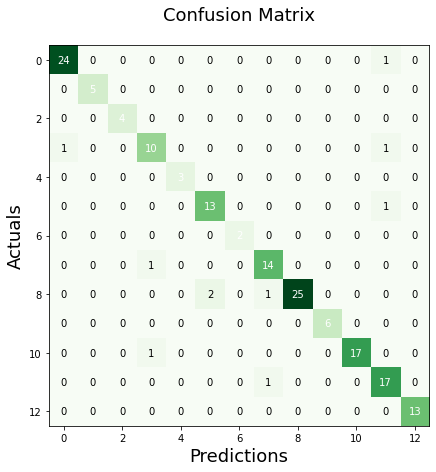

In [ ]:
#plotting the confusion matrix
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(7, 7), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Evaluating the classification report
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.83      0.83      0.83        12
           4       1.00      1.00      1.00         3
           5       0.87      0.93      0.90        14
           6       1.00      1.00      1.00         2
           7       0.88      0.93      0.90        15
           8       1.00      0.89      0.94        28
           9       1.00      1.00      1.00         6
          10       1.00      0.94      0.97        18
          12       0.85      0.94      0.89        18
          13       1.00      1.00      1.00        13

    accuracy                           0.94       163
   macro avg       0.95      0.96      0.95       163
weighted avg       0.94      0.94      0.94       163



In [ ]:
#function to return the encoded array to feed into the models
def predict_winner(team1, team2,city, toss_winner, toss_decision, neutral_venue , model=forest):
  prediction_array = []
  #  Team 1
  if team1 == 'Chennai Super Kings':
    prediction_array.append(0)
  elif team1 == 'Deccan Chargers':
    prediction_array.append(1)
  elif team1 == 'Delhi Capitals':
    prediction_array.append(2)  
  elif team1 == 'Delhi Daredevils':
    prediction_array.append(3)
  elif team1 == 'Gujarat Lions':
    prediction_array.append(4)
  elif team1 == 'Kings XI Punjab':
    prediction_array.append(5)
  elif team1 == 'Kochi Tuskers Kerala':
    prediction_array.append(6)
  elif team1 == 'Kolkata Knight Riders':
    prediction_array.append(7)
  elif team1 == 'Mumbai Indians':
    prediction_array.append(8)
  elif team1 == 'Pune Warriors':
    prediction_array.append(9)
  elif team1 == 'Rajasthan Royals':
    prediction_array.append(10)
  elif team1 == 'Rising Pune Supergiants':
    prediction_array.append(11)
  elif team1 == 'Royal Challengers Bangalore':
    prediction_array.append(12)
  elif team1 == 'Sunrisers Hyderabad':
    prediction_array.append(13)
  
  
  
  
  # Team 2 
  if team2 == 'Chennai Super Kings':
    prediction_array.append(0)
  elif team2 == 'Deccan Chargers':
    prediction_array.append(1)
  elif team2 == 'Delhi Capitals':
    prediction_array.append(2)  
  elif team2 == 'Delhi Daredevils':
    prediction_array.append(3)
  elif team2 == 'Gujarat Lions':
    prediction_array.append(4)
  elif team2 == 'Kings XI Punjab':
    prediction_array.append(5)
  elif team2 == 'Kochi Tuskers Kerala':
    prediction_array.append(6)
  elif team2 == 'Kolkata Knight Riders':
    prediction_array.append(7)
  elif team2 == 'Mumbai Indians':
    prediction_array.append(8)
  elif team2 == 'Pune Warriors':
    prediction_array.append(9)
  elif team2 == 'Rajasthan Royals':
    prediction_array.append(10)
  elif team2 == 'Rising Pune Supergiants':
    prediction_array.append(11)
  elif team2 == 'Royal Challengers Bangalore':
    prediction_array.append(12)
  elif team2 == 'Sunrisers Hyderabad':
    prediction_array.append(13)

  #cities
  #considering the major cities
  if city=='Bangalore':
    prediction_array.append(2)                              
  elif city=='Chandigarh':
    prediction_array.append(7)
  elif city=='Delhi':
    prediction_array.append(10)
  elif city=='Mumbai':
    prediction_array.append(23)
  elif city=='Kolkata':
    prediction_array.append(22)
  elif city=='Jaipur': 
    prediction_array.append(17)       
  elif city=='Chennai':
    prediction_array.append(8)
  elif city=='Hyderabad':
    prediction_array.append(15)
  elif city=='Dubai':
    prediction_array.append(12)
  
  

  #toss winner

  if toss_winner == 'Chennai Super Kings':
    prediction_array.append(0)
  elif toss_winner == 'Deccan Chargers':
    prediction_array.append(1)
  elif toss_winner == 'Delhi Capitals':
    prediction_array.append(2)  
  elif toss_winner == 'Delhi Daredevils':
    prediction_array.append(3)
  elif toss_winner == 'Gujarat Lions':
    prediction_array.append(4)
  elif toss_winner == 'Kings XI Punjab':
    prediction_array.append(5)
  elif toss_winner == 'Kochi Tuskers Kerala':
    prediction_array.append(6)
  elif toss_winner == 'Kolkata Knight Riders':
    prediction_array.append(7)
  elif toss_winner == 'Mumbai Indians':
    prediction_array.append(8)
  elif toss_winner == 'Pune Warriors':
    prediction_array.append(9)
  elif toss_winner == 'Rajasthan Royals':
    prediction_array.append(10)
  elif toss_winner == 'Rising Pune Supergiants':
    prediction_array.append(11)
  elif toss_winner == 'Royal Challengers Bangalore':
    prediction_array.append(12)
  elif toss_winner == 'Sunrisers Hyderabad':
    prediction_array.append(13)
 


  #decision 
  if toss_decision =="bat":
    prediction_array.append(0)
  elif toss_decision =="field":
    prediction_array.append(1)


  prediction_array.append(0)
  prediction_array = np.array([prediction_array])
  
  return prediction_array;



In [ ]:
#Prediction 1
pred_array=predict_winner("Kolkata Knight Riders", "Rajasthan Royals", "Kolkata","Kolkata Knight Riders", "bat",0 ) #encoding
pred = forest.predict(pred_array) #predicting usinf Randomforest model
print(pred_array)
abc=forest.predict_proba(pred_array)
num=0
if(abc[0][pred_array[0][0]]>=abc[0][pred_array[0][1]]): #selecting team with higher probablity of winning
  num=pred_array[0][0]
else:
  num=pred_array[0][1]
print('\n')
print('Predicted winning team - {}'.format(backtrack[num]))
print('\n')

[[ 7 10 22  7  0  0]]


Predicted winning team - Rajasthan Royals




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#Prediction 2
pred_array=predict_winner("Deccan Chargers", "Pune Warriors", "Mumbai","Deccan Chargers", "field",1)
pred = forest.predict(pred_array)
print(pred_array)
abc=forest.predict_proba(pred_array)
num=0

if(abc[0][pred_array[0][0]]>=abc[0][pred_array[0][1]]): #selecting team with higher probablity of winning
  num=pred_array[0][0]
else:
  num=pred_array[0][1]
print('\n')
print('Predicted winning team - {}'.format(backtrack[num]))
print('\n')

[[ 1  9 23  1  1  0]]


Predicted winning team - Deccan Chargers




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#reference for seeing the label encoded values corresponding to the cities
dt=data.copy()
dt['city_encoded'] = enc.fit_transform(dt['city'].values)
dt = dt.drop_duplicates('city')
dt


,city,neutral_venue,team1,team2,toss_winner,toss_decision,winner,city_encoded
0,Bangalore,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,2
1,Chandigarh,0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,7
2,Delhi,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,10
3,Mumbai,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,23
4,Kolkata,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,22
5,Jaipur,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,17
6,Hyderabad,0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,15
7,Chennai,0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,8
58,Cape Town,1,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,field,Mumbai Indians,5
62,Port Elizabeth,1,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,25


#For 2021
##Only for the 8 playing teams in IPL 2021

In [ ]:
#list of the 8 playing teams
ls=["Chennai Super Kings",
"Mumbai Indians",
"Delhi Capitals",
"Rajasthan Royals",
"Kings XI Punjab",
"Sunrisers Hyderabad",
"Kolkata Knight Riders",
"Royal Challengers Bangalore"]

print(data.shape)
data = data[(data['team1'].isin(ls)) & (data['team2'].isin(ls))] #retaining data related to these 8 teams only
print(data.shape)

(812, 7)
(495, 7)


In [ ]:
data.head(5)

,city,neutral_venue,team1,team2,toss_winner,toss_decision,winner
0,Bangalore,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders
1,Chandigarh,0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings
3,Mumbai,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore
5,Jaipur,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals
7,Chennai,0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings


##Feature Encoding

In [ ]:
#feature encoding the columns- team1, team2, toss_winner, 'toss decision', 'winner
encode={ 'team1':{'Chennai Super Kings':0,'Delhi Capitals':1, 'Kings XI Punjab':2,'Kolkata Knight Riders':3,'Mumbai Indians':4,'Rajasthan Royals':5,'Royal Challengers Bangalore':6,'Sunrisers Hyderabad':7},
    'team2':{'Chennai Super Kings':0,'Delhi Capitals':1, 'Kings XI Punjab':2,'Kolkata Knight Riders':3,'Mumbai Indians':4,'Rajasthan Royals':5,'Royal Challengers Bangalore':6,'Sunrisers Hyderabad':7},
    'toss_winner':{'Chennai Super Kings':0,'Delhi Capitals':1, 'Kings XI Punjab':2,'Kolkata Knight Riders':3,'Mumbai Indians':4,'Rajasthan Royals':5,'Royal Challengers Bangalore':6,'Sunrisers Hyderabad':7},
    'winner':{'Chennai Super Kings':0,'Delhi Capitals':1, 'Kings XI Punjab':2,'Kolkata Knight Riders':3,'Mumbai Indians':4,'Rajasthan Royals':5,'Royal Challengers Bangalore':6,'Sunrisers Hyderabad':7}}
data.replace(encode, inplace= True)
data


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,city,neutral_venue,team1,team2,toss_winner,toss_decision,winner
0,Bangalore,0,6,3,6,field,3
1,Chandigarh,0,2,0,0,bat,0
3,Mumbai,0,4,6,4,bat,6
5,Jaipur,0,5,2,2,bat,5
7,Chennai,0,0,4,4,field,0
...,...,...,...,...,...,...,...
811,Dubai,0,6,4,4,field,6
812,Dubai,0,4,1,1,field,4
813,Abu Dhabi,0,6,7,7,field,7
814,Abu Dhabi,0,1,7,1,bat,1


In [ ]:
data['toss_decision'].replace(['bat','field'],[0,1], inplace=True)
data.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,city,neutral_venue,team1,team2,toss_winner,toss_decision,winner
0,Bangalore,0,6,3,6,1,3
1,Chandigarh,0,2,0,0,0,0
3,Mumbai,0,4,6,4,0,6
5,Jaipur,0,5,2,2,0,5
7,Chennai,0,0,4,4,1,0
9,Chandigarh,0,2,4,4,1,2
10,Bangalore,0,6,5,5,1,5
11,Chennai,0,0,3,3,0,0
14,Bangalore,0,6,0,0,0,0
15,Kolkata,0,3,4,3,0,4


In [ ]:
data['city']=enc.fit_transform(data['city'])
data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,city,neutral_venue,team1,team2,toss_winner,toss_decision,winner
0,2,0,6,3,6,1,3
1,6,0,2,0,0,0,0
3,20,0,4,6,4,0,6
5,16,0,5,2,2,0,5
7,7,0,0,4,4,1,0
9,6,0,2,4,4,1,2
10,2,0,6,5,5,1,5
11,7,0,0,3,3,0,0
14,2,0,6,0,0,0,0
15,19,0,3,4,3,0,4


##Random Forest Classifier
As we saw earlier that Random Forest Classifier outperformed the Decision Tree Classifier

In [ ]:
#defining features and labels
features = data.drop(['winner'], axis=1)
labels = data['winner']


In [ ]:
# 80:20 train-test split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print("Training Set :{}".format(train_features.shape))
print("Testing Set :{}".format(test_features.shape))

Training Set :(396, 6)
Testing Set :(99, 6)


In [ ]:
forest= RandomForestClassifier(n_estimators=200)
#training
forest.fit(train_features.values, train_labels.values)

RandomForestClassifier(n_estimators=200)

In [ ]:
print("Train Accuracy- {}%".format(forest.score(train_features.values, train_labels.values)*100))
forest.fit(test_features.values, test_labels.values)
print("Test Accuracy- {}%".format(forest.score(test_features.values, test_labels.values)*100))


Train Accuracy- 88.13131313131312%
Test Accuracy- 93.93939393939394%


In [ ]:
print("---- Random Forest Classifier - Model Evaluation ----")
y_pred = forest.predict(test_features)

#error scores
print("MAE- {}".format(metrics.mean_absolute_error(test_labels, y_pred)))
print("MSE- {}".format(metrics.mean_squared_error(test_labels, y_pred)))
print("RMSE - {}".format(np.sqrt(metrics.mean_squared_error(test_labels, y_pred))))

---- Random Forest Classifier - Model Evaluation ----
MAE- 0.18181818181818182
MSE- 0.7070707070707071
RMSE - 0.8408749651825217


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import classification_report
y_pred = forest.predict(test_features.values)
print(classification_report(test_labels.values, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       1.00      1.00      1.00         6
           2       1.00      0.93      0.96        14
           3       0.93      0.93      0.93        14
           4       0.95      0.95      0.95        19
           5       0.90      0.90      0.90        10
           6       0.85      0.92      0.88        12
           7       1.00      1.00      1.00         8

    accuracy                           0.94        99
   macro avg       0.94      0.94      0.94        99
weighted avg       0.94      0.94      0.94        99



In [ ]:
#function to return the encoded array to feed into the models
def predict_winner2021(team1, team2,city, toss_winner, toss_decision, neutral_venue , model=forest):
  prediction_array = []
  #  Team 1
  if team1 == 'Chennai Super Kings':
    prediction_array.append(0)

  elif team1 == 'Delhi Capitals':
    prediction_array.append(1)  
  
  
  elif team1 == 'Kings XI Punjab':
    prediction_array.append(2)
  
  elif team1 == 'Kolkata Knight Riders':
    prediction_array.append(3)
  elif team1 == 'Mumbai Indians':
    prediction_array.append(4)
  
  elif team1 == 'Rajasthan Royals':
    prediction_array.append(5)
  
  elif team1 == 'Royal Challengers Bangalore':
    prediction_array.append(6)
  elif team1 == 'Sunrisers Hyderabad':
    prediction_array.append(7)
  
  
  
  
  # Team 2 
  if team2 == 'Chennai Super Kings':
    prediction_array.append(0)

  elif team2 == 'Delhi Capitals':
    prediction_array.append(1)  
  
  
  elif team2 == 'Kings XI Punjab':
    prediction_array.append(2)
  
  elif team2 == 'Kolkata Knight Riders':
    prediction_array.append(3)
  elif team2 == 'Mumbai Indians':
    prediction_array.append(4)
  
  elif team2 == 'Rajasthan Royals':
    prediction_array.append(5)
  
  elif team2 == 'Royal Challengers Bangalore':
    prediction_array.append(6)
  elif team2 == 'Sunrisers Hyderabad':
    prediction_array.append(7)
  #cities
  
  if city=='Bangalore':
    prediction_array.append(2)                              
  elif city=='Chandigarh':
    prediction_array.append(6)
  elif city=='Delhi':
    prediction_array.append(9)
  elif city=='Mumbai':
    prediction_array.append(20)
  elif city=='Kolkata':
    prediction_array.append(19)
  elif city=='Jaipur': 
    prediction_array.append(5)       
  elif city=='Chennai':
    prediction_array.append(7)
  elif city=='Hyderabad':
    prediction_array.append(13)
  elif city=='Dubai':
    prediction_array.append(11)
  
  

  #toss winner

  if toss_winner == 'Chennai Super Kings':
    prediction_array.append(0)

  elif toss_winner == 'Delhi Capitals':
    prediction_array.append(1)  
  
  
  elif toss_winner == 'Kings XI Punjab':
    prediction_array.append(2)
  
  elif toss_winner == 'Kolkata Knight Riders':
    prediction_array.append(3)
  elif toss_winner == 'Mumbai Indians':
    prediction_array.append(4)
  
  elif toss_winner == 'Rajasthan Royals':
    prediction_array.append(5)
  
  elif toss_winner == 'Royal Challengers Bangalore':
    prediction_array.append(6)
  elif toss_winner == 'Sunrisers Hyderabad':
    prediction_array.append(7)
 


  #decision 
  if toss_decision =="bat":
    prediction_array.append(0)
  elif toss_decision =="field":
    prediction_array.append(1)


  prediction_array.append(0)
  prediction_array = np.array([prediction_array])
  
  return prediction_array;



In [ ]:
#for reference
backtrack2= ['Chennai Super Kings','Delhi Capitals', 'Kings XI Punjab','Kolkata Knight Riders','Mumbai Indians','Rajasthan Royals','Royal Challengers Bangalore','Sunrisers Hyderabad']

In [ ]:
#Random Prediction
pred_array= predict_winner2021("Kolkata Knight Riders", "Sunrisers Hyderabad", "Kolkata","Kolkata Knight Riders", "bat",0 )
pred = forest.predict(pred_array)
print(pred_array)
abc=forest.predict_proba(pred_array)

num=0
if(abc[0][pred_array[0][0]]>=abc[0][pred_array[0][1]]):
  num=pred_array[0][0]
else:
  num=pred_array[0][1]
  
print('Predicted winning team - {}'.format(backtrack2[num]))

[[ 3  7 19  3  0  0]]
Predicted winning team - Sunrisers Hyderabad



#Experiments-
Randomly Selected Matches from 2021

1) Ipl 2021

Match 1

MI vs RCB

RCB won the toss and decided to field

RCB won the match

In [ ]:
pred_array=predict_winner2021("Royal Challengers Bangalore", "Mumbai Indians", "Chennai","Royal Challengers Bangalore", "field",0 )
pred = forest.predict(pred_array)
print(pred_array)
abc=forest.predict_proba(pred_array)

num=0
if(abc[0][pred_array[0][0]]>=abc[0][pred_array[0][1]]):
  num=pred_array[0][0]
else:
  num=pred_array[0][1]


print('\n')
print('Predicted winning team - {}'.format(backtrack2[num]))
print('\n')


[[6 4 7 6 1 0]]


Predicted winning team - Royal Challengers Bangalore




Our model's prediction is correct

2) Ipl 2021

   Match 18

   RR vs KKR

   RR won the toss and decided to field

   RR won the match

In [ ]:
pred_array=predict_winner2021("Rajasthan Royals", "Kolkata Knight Riders", "Mumbai","Rajasthan Royals", "field",0 )
pred = forest.predict(pred_array)
print(pred_array)
abc=forest.predict_proba(pred_array)

num=0
if(abc[0][pred_array[0][0]]>=abc[0][pred_array[0][1]]):
  num=pred_array[0][0]
else:
  num=pred_array[0][1]


print('\n')
print('Predicted winning team - {}'.format(backtrack2[num]))
print('\n')


[[ 5  3 20  5  1  0]]


Predicted winning team - Rajasthan Royals




Our model's prediction is correct

3) Ipl 2021

Match 22

DC vs RCB

DC won the toss and decided to field

RCB won the match

In [ ]:
pred_array=predict_winner2021("Royal Challengers Bangalore", "Delhi Capitals", "Jaipur","Delhi Capitals", "field",0 )
pred = forest.predict(pred_array)
print(pred_array)
abc=forest.predict_proba(pred_array)

num=0
if(abc[0][pred_array[0][0]]>=abc[0][pred_array[0][1]]):
  num=pred_array[0][0]
else:
  num=pred_array[0][1]


print('\n')
print('Predicted winning team - {}'.format(backtrack2[num]))
print('\n')

[[6 1 5 1 1 0]]


Predicted winning team - Royal Challengers Bangalore




Our model's prediction is correct

4) Ipl 2021

Match 40

RR vs SRH

RR won the toss and decided to bat

SRH won the match

In [ ]:
pred_array=predict_winner2021("Rajasthan Royals", "Sunrisers Hyderabad", "Dubai","Rajasthan Royals", "bat",0 )
pred = forest.predict(pred_array)
print(pred_array)
abc=forest.predict_proba(pred_array)

num=0
if(abc[0][pred_array[0][0]]>=abc[0][pred_array[0][1]]):
  num=pred_array[0][0]
else:
  num=pred_array[0][1]


print('\n')
print('Predicted winning team - {}'.format(backtrack2[num]))
print('\n')


[[ 5  7 11  5  0  0]]


Predicted winning team - Sunrisers Hyderabad




Our model's prediction is correct

5) Ipl 2021

Match 53

MI vs KXIP

KXIP won the toss and decided to field

KXIP won the match

In [ ]:

pred_array=predict_winner2021("Mumbai Indians", "Kings XI Punjab", "Chennai","Kings XI Punjab", "field",0 )
pred = forest.predict(pred_array)
print(pred_array)
abc=forest.predict_proba(pred_array)

num=0
if(abc[0][pred_array[0][0]]>=abc[0][pred_array[0][1]]):
  num=pred_array[0][0]
else:
  num=pred_array[0][1]


print('\n')
print('Predicted winning team - {}'.format(backtrack2[num]))
print('\n')


[[4 2 7 2 1 0]]


Predicted winning team - Kings XI Punjab




Our model's prediction is correct

6) Ipl 2021

   Finals

   KKR vs CSK

   KKR won the toss and decided to field

   CSK won the match

In [ ]:
pred_array=predict_winner( "Chennai Super Kings","Kolkata Knight Riders",'Dubai', "Kolkata Knight Riders", "field",0 )
pred = forest.predict(pred_array)
print(pred_array)
abc=forest.predict_proba(pred_array)



if(abc[0][pred_array[0][0]]>=abc[0][pred_array[0][1]]):
  num=pred_array[0][0]
else:
  num=pred_array[0][1]

print('\n')
print('Predicted winning team - {}'.format(backtrack[num]))
print('\n')


[[ 0  7 12  7  1  0]]


Predicted winning team - Kolkata Knight Riders




Our model's prediction is inconsistent in the following case but if one had closely followed the match, in the beginning CSK had given a massive target of 193 but the way KKR started in the first 7-8 overs everyone predicted KKR was going to win.

But eventually due to some untimed wicked and mishappenings KKR lost its momentum and ended up losing the match.

Which shows us that there is always an element of luck involved which no one can account for. Whereas our model's prediction can be considered apt as KKR gave a good contention to CSK in the finals and if hadn't been one of those hard luck days KKR would have surely lifted the trophy.

In [ ]:

import random


In [ ]:
teams=['KXIP','SRH','KKR','RR','MI','CSK','RCB','DC']

In [ ]:
#based on the 1on1 match winner predictor; we ran a simulation for 500 leagues, running all the 2*8C2= 56 matches to take the average performnce of teams for IPL 2021 
match_wins= np.zeros(8)
for k in range(0,500):#simulating 500 leagues
  
  for i in range(0,8): ## deciding result 1v1 matches

   for j in range(i+1,8):
    
      pr= [[i,j, random.choices([2,5,6,7,9,13,19,20])[0] , random.choices([i,j])[0]  , random.choices([0,1])[0]  , 0]]
    
      abc=forest.predict_proba(pr)
      tot= abc[0][i] + abc[0][j]
      weight= ( abc[0][i]/tot , abc[0][j]/tot)

      randomList = random.choices([i,j], weights=weight, k=2)
      match_wins[randomList[0]]+=1
      match_wins[randomList[1]]+=1
   


In [ ]:

print(match_wins)

[ 76.  25. 101.  62.  48.  65.  86.  97.]


In [ ]:
match_wins=[3187, 1109, 3142, 2920, 3832, 4150, 5487, 4173]
wins= match_wins.copy()
sum=0

for i in range(0,8):
  match_wins[i]/= 56*5 #chances of team winning 
  
print(match_wins)
  

[11.382142857142858, 3.960714285714286, 11.221428571428572, 10.428571428571429, 13.685714285714285, 14.821428571428571, 19.59642857142857, 14.903571428571428]


Text(0.5, 1.0, 'Chance of team winning IPL 2021')

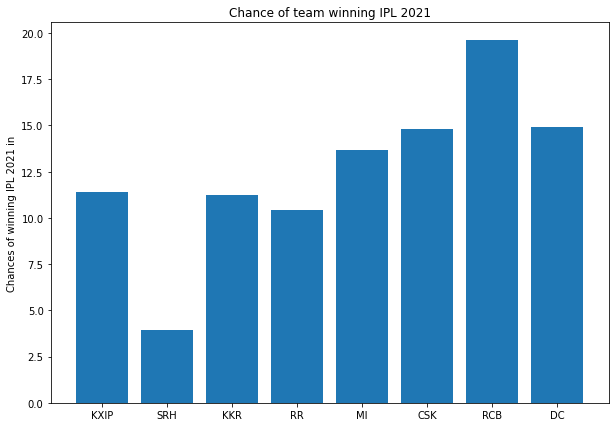

In [ ]:
#Supposing no qualifiers system and winner decided only from the leaderboard at the end of the league matches
#The teams have following probality of winning IPL 2021

fig = plt.figure(figsize =(10, 7))
plt.bar(teams, height=match_wins)
plt.ylabel('Chances of winning IPL 2021 in')
plt.title("Chance of team winning IPL 2021")

Text(0.5, 1.0, 'Chance of team winning IPL 2021')

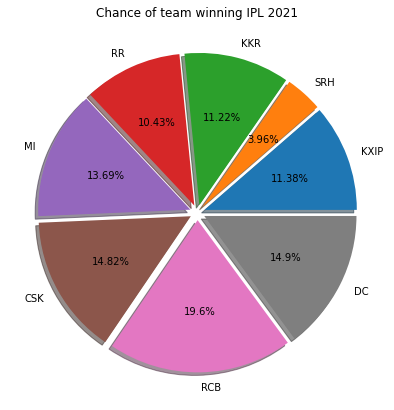

In [ ]:
#pie chart representation of chances of team winning IPL 2021
fig = plt.figure(figsize =(10, 7))

def func(pct, data):
    return "{}%".format(round(pct,2))

plt.pie(match_wins, autopct = lambda pct: func(pct, match_wins), labels = teams,explode= (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05), 
        shadow= True, textprops = dict(color ="black"))
plt.title("Chance of team winning IPL 2021")

IPL 2021 Final Standing after the 56 league matches-

1)Delhi Capitals

2)Chennai Super Kings

3)Royal Challengers Bangalore

4)Kolkata Knight Riders

5)Mumbai Indians

6)Kings XI Punjab

7)Rajasthan Royals

8)Sunrisers Hyderabad




Notice-

=>The top 6 teams predicted by our model are same as the top 6 teams in IPL 2021

=>Also the 3 out of the top 4 teams which go into qualifiers are the same except for KKR 

=>Rajasthan Royals and Sunrisers Hyderabad were poorest performing teams as predicted




#Extra Feature- Score Prediction
Predicts projected score of batting team based on the current standings of the match

In [ ]:
data=pd.read_csv("IPL 2008-2017 ball by ball.csv")
df=data.copy()
data.head(10)
#data available till only 2017
#so predictions of 2018
data2=data.copy()

In [ ]:
data.dtypes

mid                 int64
date               object
venue              object
batting_team       object
bowling_team       object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [ ]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [ ]:
df.isnull().sum()

mid               0
date              0
venue             0
batting_team      0
bowling_team      0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

#Data Cleaning and Exploratory Data Analysis

In [ ]:
#removing factors which do not contribute to the total score
irrelevant= {'mid',	'date',	'venue',	'batsman',	'bowler','striker', 'non-striker'}
data.drop(irrelevant,axis=1, inplace=True)

irrelevant2= {'date',	'venue',	'batsman',	'bowler','striker', 'non-striker'}
data2.drop(irrelevant2,axis=1, inplace=True)
data


,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...
76009,Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,129
76010,Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,129
76011,Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,129
76012,Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,129


In [ ]:
print(data.shape)

(76014, 8)


In [ ]:
data2.head(10)

,mid,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
5,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.5,2,0,222
6,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,0,0.6,3,0,222
7,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,0,1.1,3,0,222
8,1,Kolkata Knight Riders,Royal Challengers Bangalore,7,0,1.2,7,0,222
9,1,Kolkata Knight Riders,Royal Challengers Bangalore,11,0,1.3,11,0,222


# for runs last 5 over to make sense


In [ ]:
data= data[data['overs']>5]


In [ ]:
#getting names of all the teams
data['batting_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [ ]:
 #Rising Super Giants was repeated with 2 different spellings
 data = data.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'}, regex=True)
 data = data.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants'}, regex=True)

 data['batting_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In [ ]:
teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions']

In [ ]:
avg_score=np.zeros(13)
for i in range(0,13):
  df2=data2[data2["batting_team"]== teams[i]]
  plt.figure(figsize=(10,7))
  df2= df2.drop(['batting_team','bowling_team','runs','wickets','overs','runs_last_5'	,'wickets_last_5'], axis=1)
  df2
  df3=df2.groupby(['mid']).mean()

  avg_score[i]=df3['total'].sum()/df3['total'].shape[0]




<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, 'Average Score of Teams')

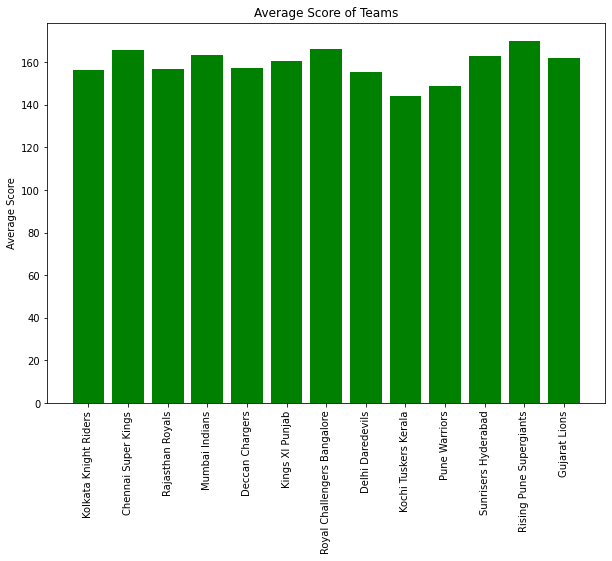

In [ ]:
fig = plt.figure(figsize =(10, 7))

plt.bar(teams, height=avg_score, color='green')
plt.xticks(rotation=90)
plt.ylabel('Average Score')
plt.title('Average Score of Teams')

In [ ]:
avg_wickets=np.zeros(13)
for i in range(0,13):
  df2=data2[data2["batting_team"]== teams[i]]
  plt.figure(figsize=(10,7))
  df2= df2.drop(['batting_team','bowling_team','runs','overs','runs_last_5'	,'wickets_last_5','total'], axis=1)
  df3=df2.groupby(['mid']).max()
  avg_wickets[i]=df3['wickets'].sum()/df3['wickets'].shape[0]

avg_wickets

array([6.03030303, 5.36486486, 6.24074074, 6.1097561 , 6.46511628,
       6.61333333, 5.80882353, 6.4137931 , 7.28571429, 6.25      ,
       5.80952381, 5.16666667, 7.14285714])

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, 'Average Wickets Lost of Teams when batting')

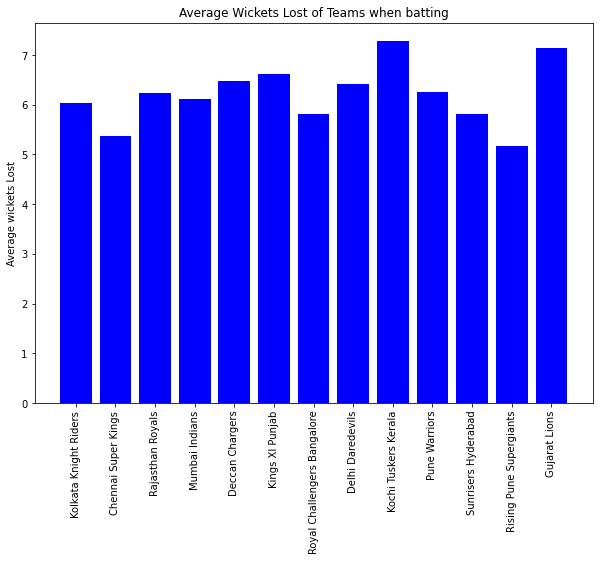

In [ ]:
fig = plt.figure(figsize =(10, 7))

plt.bar(teams, height=avg_wickets, color='blue')
plt.xticks(rotation=90)
plt.ylabel('Average wickets Lost')
plt.title('Average Wickets Lost of Teams when batting')

##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

data2=data.copy()

for col in ['batting_team', 'bowling_team']:
  data2[col] = enc.fit_transform(data2[col])


In [ ]:
data2

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,6,11,1,0,0.1,1,0,222
1,6,11,1,0,0.2,1,0,222
2,6,11,2,0,0.2,2,0,222
3,6,11,2,0,0.3,2,0,222
4,6,11,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...
76009,7,10,121,7,19.2,40,0,129
76010,7,10,127,7,19.3,46,0,129
76011,7,10,128,7,19.4,47,0,129
76012,7,10,129,7,19.5,48,0,129


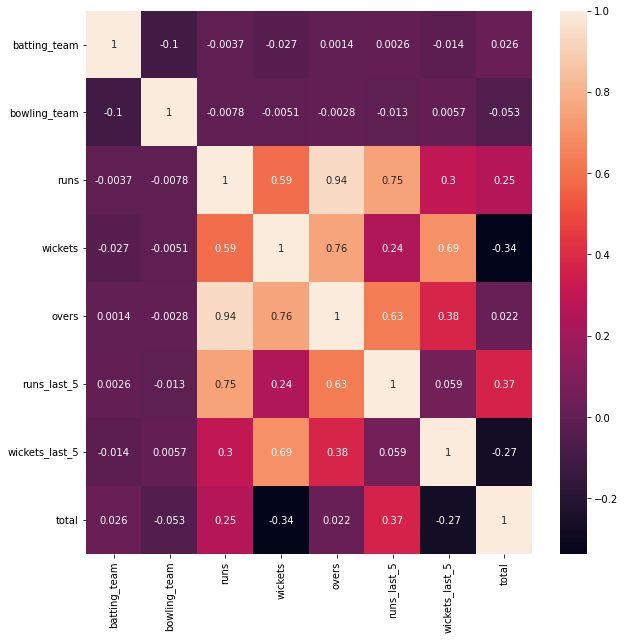

In [ ]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data2.corr(),annot=True)
plt.show()

##Column Transformer


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),  [0, 1])], remainder='passthrough')

In [ ]:
data = columnTransformer.fit_transform(data).toarray()

In [ ]:
data.shape

(76014, 32)

In [ ]:
#encoding is done in order i.e. alphabetical order
column = ['bat_CSK','bat_DC', 'bat_DD','bat_GL',  'bat_KXIP', 'bat_KTK',
              'bat_KKR', 'bat_MI', 'bat_PW' ,'bat_RR',
              'bat_RCB','bat_RPS' ,'bat_SRH',
          'bowl_CSK','bowl_DC', 'bowl_DD','bowl_GL',  'bowl_KXIP', 'bowl_KTK',
              'bowl_KKR', 'bowl_MI', 'bowl_PW' ,'bowl_RR',
              'bowl_RCB','bowl_RPS' ,'bowl_SRH', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']

data = pd.DataFrame(data, columns=column)

In [ ]:
data

,bat_CSK,bat_DC,bat_DD,bat_GL,bat_KXIP,bat_KTK,bat_KKR,bat_MI,bat_PW,bat_RR,bat_RCB,bat_RPS,bat_SRH,bowl_CSK,bowl_DC,bowl_DD,bowl_GL,bowl_KXIP,bowl_KTK,bowl_KKR,bowl_MI,bowl_PW,bowl_RR,bowl_RCB,bowl_RPS,bowl_SRH,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.1,1.0,0.0,222.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.2,1.0,0.0,222.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.2,2.0,0.0,222.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.3,2.0,0.0,222.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.4,2.0,0.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,121.0,7.0,19.2,40.0,0.0,129.0
76010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,127.0,7.0,19.3,46.0,0.0,129.0
76011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,128.0,7.0,19.4,47.0,0.0,129.0
76012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,129.0,7.0,19.5,48.0,0.0,129.0


#Model

In [ ]:
#defining features and labels
features = data.drop(['total'], axis=1)
labels = data['total']

In [ ]:
# 80:20 split
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)

print(train_features.shape)
print(test_features.shape)

(60811, 31)
(15203, 31)


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
#train
linear = LinearRegression()
linear.fit(train_features.values, train_labels.values) 

LinearRegression()

In [ ]:
print("Train Accuracy- {}%".format(linear.score(train_features.values, train_labels.values)*100))
linear.fit(test_features.values, test_labels.values)
print("Test Accuracy- {}%".format(linear.score(test_features.values, test_labels.values)*100))


Train Accuracy- 52.74473015972128%
Test Accuracy- 53.18838104568907%


In [ ]:
import sklearn.metrics as metrics
#error scores
y_pred = linear.predict(test_features)
print("MAE- {}".format(metrics.mean_absolute_error(test_labels, y_pred)))
print("MSE- {}".format(metrics.mean_squared_error(test_labels, y_pred)))
print("RMSE - {}".format(np.sqrt(metrics.mean_squared_error(test_labels, y_pred))))

MAE- 14.896384802964729
MSE- 399.9170220200062
RMSE - 19.997925442905476


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


SVM

In [ ]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(train_features, train_labels)

In [ ]:
print("Train Accuracy- {}%".format(svm.score(train_features.values, train_labels.values)*100))
svm.fit(test_features.values, test_labels.values)
print("Test Accuracy- {}%".format(svm.score(test_features.values, test_labels.values)*100))

In [ ]:
error scores
y_pred = svm.predict(test_features)
print("MAE- {}".format(metrics.mean_absolute_error(test_labels, y_pred)))
print("MSE- {}".format(metrics.mean_squared_error(test_labels, y_pred)))
print("RMSE - {}".format(np.sqrt(metrics.mean_squared_error(test_labels, y_pred))))

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(train_features.values, train_labels.values)

RandomForestRegressor()

In [ ]:
print("Train Accuracy- {}%".format(forest.score(train_features.values, train_labels.values)*100))
forest.fit(test_features.values, test_labels.values)
print("Test Accuracy- {}%".format(forest.score(test_features.values, test_labels.values)*100))

Train Accuracy- 95.91950943749109%
Test Accuracy- 95.45705539416588%


In [ ]:
y_pred = forest.predict(test_features)

print("MAE- {}".format(metrics.mean_absolute_error(test_labels, y_pred)))
print("MSE- {}".format(metrics.mean_squared_error(test_labels, y_pred)))
print("RMSE - {}".format(np.sqrt(metrics.mean_squared_error(test_labels, y_pred))))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


MAE- 4.007041626861449
MSE- 38.81089606706973
RMSE - 6.229839168635875


therefore we will use random forest regressor as it is giving the highest accuracies and lowest error scores

In [ ]:
#function to return the predicted scores based on batting team, bowling team, runs, wickets, overs, runs_last_5, wickets_last_5
def projection_score(bat, bowl, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  predict_array = []
  
  if bat == 'Chennai Super Kings':
    predict_array+= [1,0,0,0,0,0,0,0,0,0,0,0,0]
  elif bat == 'Deccan Chargers':
    predict_array+= [0,1,0,0,0,0,0,0,0,0,0,0,0]
  elif bat == 'Delhi Daredevils':
    predict_array+= [0,0,1,0,0,0,0,0,0,0,0,0,0]
  elif bat == 'Gujarat Lions':
    predict_array+= [0,0,0,1,0,0,0,0,0,0,0,0,0]
  elif bat == 'Kings XI Punjab':
    predict_array+= [0,0,0,0,1,0,0,0,0,0,0,0,0]
  elif bat == 'Kochi Tuskers Kerala':
    predict_array+= [0,0,0,0,0,1,0,0,0,0,0,0,0]
  elif bat == 'Kolkata Knight Riders':
    predict_array+= [0,0,0,0,0,0,1,0,0,0,0,0,0]
  elif bat == 'Mumbai Indians':
    predict_array+= [0,0,0,0,0,0,0,1,0,0,0,0,0]
  elif bat == 'Pune Warriors':
    predict_array+= [0,0,0,0,0,0,0,0,1,0,0,0,0]
  elif bat == 'Rajasthan Royals':
    predict_array+= [0,0,0,0,0,0,0,0,0,1,0,0,0]
  elif bat == 'Royal Challengers Bangalore':
    predict_array+= [0,0,0,0,0,0,0,0,0,0,1,0,0]
  elif bat == 'Rising Pune Supergiants':
    predict_array+= [0,0,0,0,0,0,0,0,0,0,0,1,0]
  elif bat == 'Sunrisers Hyderabad':
    predict_array+= [0,0,0,0,0,0,0,0,0,0,0,0,1]



  if bowl == 'Chennai Super Kings':
    predict_array+= [1,0,0,0,0,0,0,0,0,0,0,0,0]
  elif bowl == 'Deccan Chargers':
    predict_array+= [0,1,0,0,0,0,0,0,0,0,0,0,0]
  elif bowl == 'Delhi Daredevils':
    predict_array+= [0,0,1,0,0,0,0,0,0,0,0,0,0]
  elif bowl == 'Gujarat Lions':
    predict_array+= [0,0,0,1,0,0,0,0,0,0,0,0,0]
  elif bowl == 'Kings XI Punjab':
    predict_array+= [0,0,0,0,1,0,0,0,0,0,0,0,0]
  elif bowl == 'Kochi Tuskers Kerala':
    predict_array+= [0,0,0,0,0,1,0,0,0,0,0,0,0]
  elif bowl == 'Kolkata Knight Riders':
    predict_array+= [0,0,0,0,0,0,1,0,0,0,0,0,0]
  elif bowl == 'Mumbai Indians':
    predict_array+= [0,0,0,0,0,0,0,1,0,0,0,0,0]
  elif bowl == 'Pune Warriors':
    predict_array+= [0,0,0,0,0,0,0,0,1,0,0,0,0]
  elif bowl == 'Rajasthan Royals':
    predict_array+= [0,0,0,0,0,0,0,0,0,1,0,0,0]
  elif bowl == 'Royal Challengers Bangalore':
    predict_array+= [0,0,0,0,0,0,0,0,0,0,1,0,0]
  elif bowl == 'Rising Pune Supergiants':
    predict_array+= [0,0,0,0,0,0,0,0,0,0,0,1,0]
  elif bowl == 'Sunrisers Hyderabad':
    predict_array+= [0,0,0,0,0,0,0,0,0,0,0,0,1]

 

  predict_array+= [runs, wickets, overs, runs_last_5, wickets_last_5]
  predict_array = np.array([predict_array])
  return round(model.predict(predict_array)[0])
  

##Random Score projections of matches from 2018

In [ ]:
#Projection Score 1-
#CSK VS RR
#CSK batting
#overs- 14.1
#Runs- 153
#wickets- 3
#runs in last 5 over- 56
#wickets in last 5 overs - 2

#Final score - 205

projection_score('Sunrisers Hyderabad','Rajasthan Royals', 153,3, 14.1, 56, 2 )

211

In [ ]:
#Projection Score 2-
#DD VS CSK
#DD batting
#overs- 10.4
#Runs- 80
#wickets- 3
#runs in last 5 over- 43
#wickets in last 5 overs - 2

#Final score - 165

projection_score('Delhi Daredevils','Chennai Super Kings', 80,3, 10.4, 43, 2 )

172

In [ ]:
#Projection Score 3-
#SRH VS KXIP
#SRH batting
#overs- 16.3
#Runs- 100
#wickets- 4
#runs in last 5 over- 35
#wickets in last 5 overs - 1

#Final score - 132

projection_score('Sunrisers Hyderabad','Kings XI Punjab', 100,4, 16.3, 35, 1 )

141

The scores projected by our model are pretty consistent with the actual scores made by the team